# 1. Изучение датасета 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.eval_measures import rmse
#Я решил попробовать две разных библиотеки по моделям

import warnings

warnings.simplefilter('ignore')

In [2]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [8]:
df.columns = df.columns.str.lower() #для удобства переведем все в нижний регистр 

Данные кажутся вполне чистыми, вероятно некоторые аномалии мы еще выявим, но пока необходимый минимум выполнен. Явных выбросов я не вижу.

# 2. EDA анализ

В рамках данной задачи мы будем знакомиться с данными и пытаться понять, какие вообще закономерности могут быть. Сперва я проведу все вычисления, а затем сделаю некоторый вывод

In [9]:
churn_grp = df.groupby('churn').agg({'churn':'count'}).rename(columns={'churn':'count'}).reset_index()
churn_grp

,churn,count
0,0,2939
1,1,1061


In [10]:
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum())*100
churn_grp

,churn,count,pct
0,0,2939,73.475
1,1,1061,26.525


In [11]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [12]:
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits','month_to_end_contract']

In [13]:
columns2 = ['age','avg_additional_charges_total', 'avg_class_frequency_total','avg_class_frequency_current_month', 'lifetime' ]

In [14]:
aggr = df.groupby('churn').agg({'age':'mean',
                                'avg_additional_charges_total':'mean', 
                                'avg_class_frequency_total':'mean',
                                'avg_class_frequency_current_month':'mean', 
                                'lifetime':'mean'}).reset_index()
aggr

,churn,age,avg_additional_charges_total,avg_class_frequency_total,avg_class_frequency_current_month,lifetime
0,0,29.976523,158.445715,2.024876,2.027882,4.711807
1,1,26.989632,115.082899,1.474995,1.044546,0.990575


In [15]:
def countplot(df, column):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column, hue='churn')
    plt.title(column)
    plt.show()

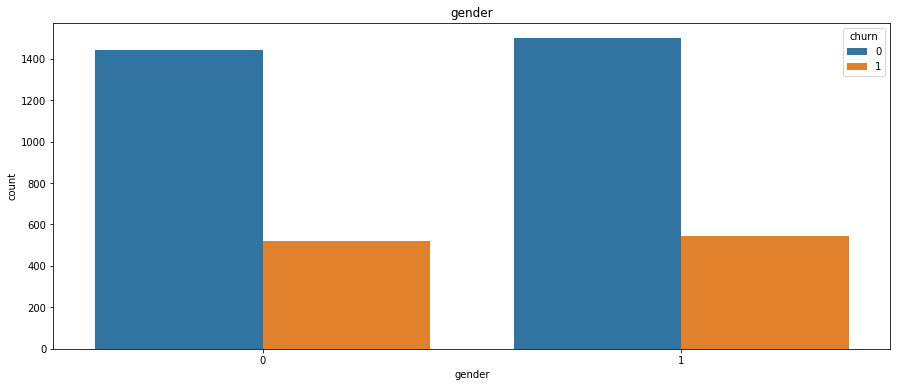

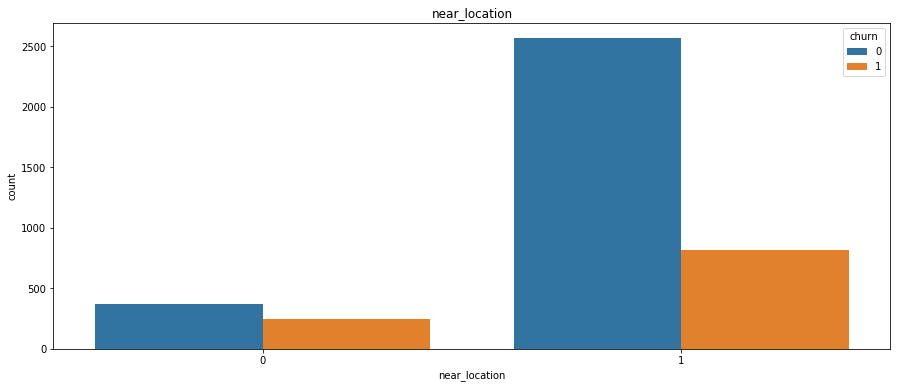

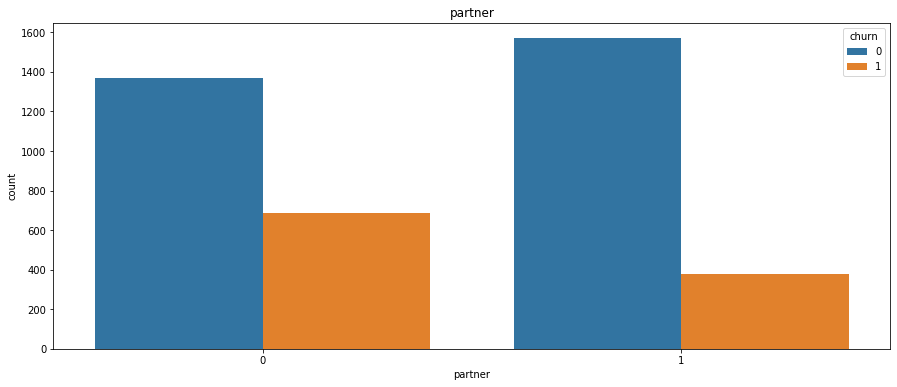

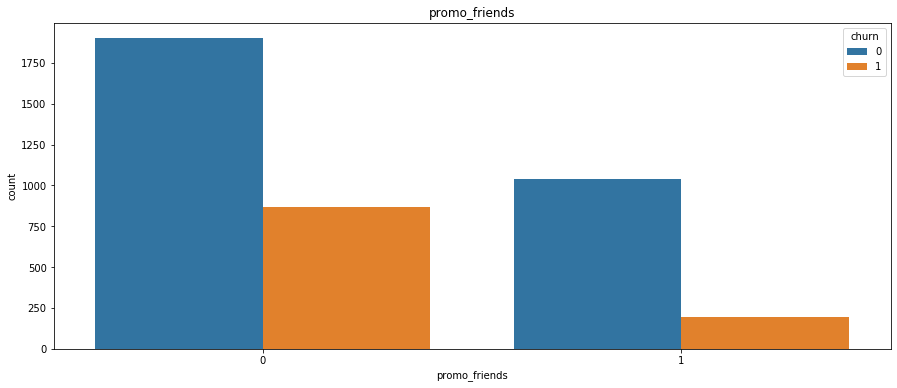

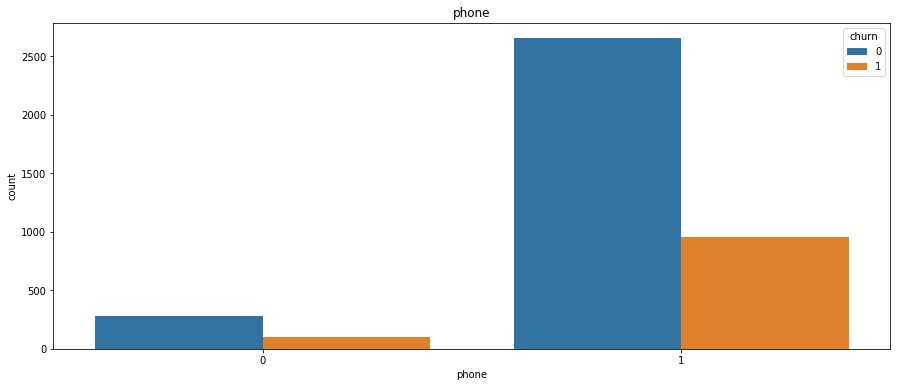

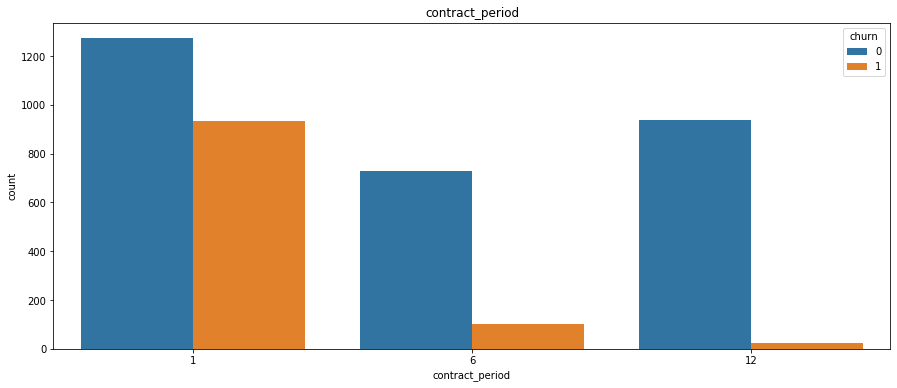

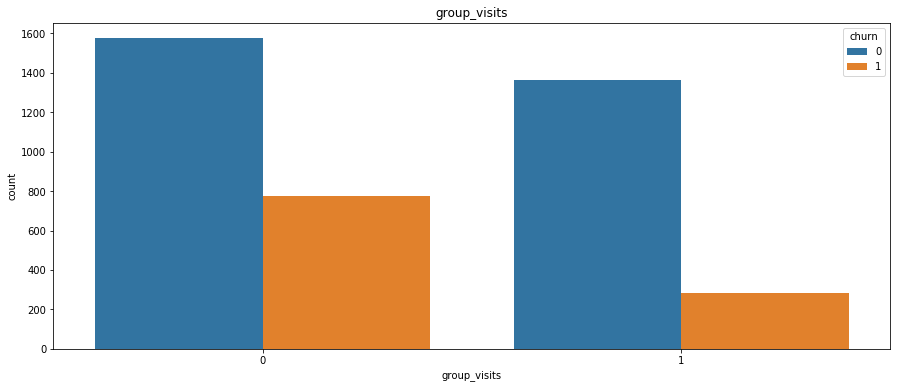

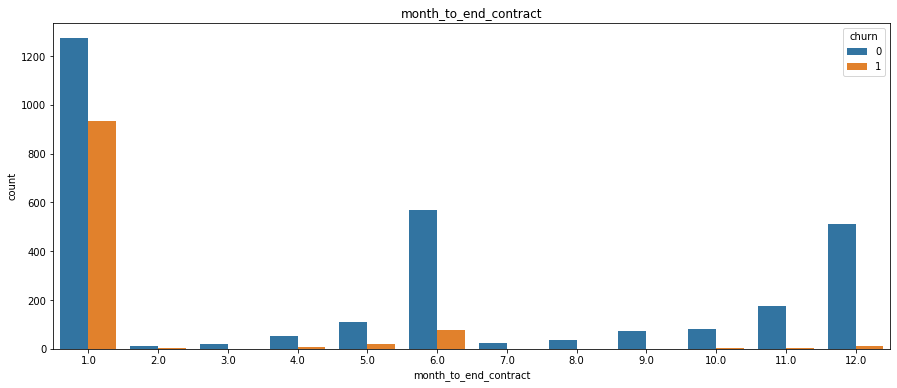

In [16]:
for i in columns:
    countplot(df,i)

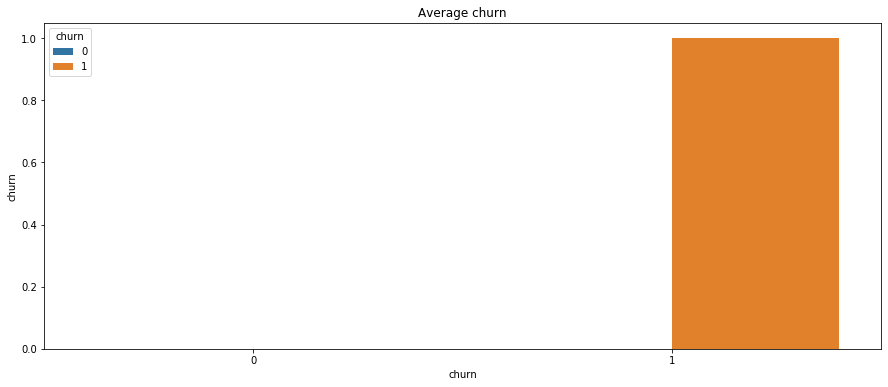

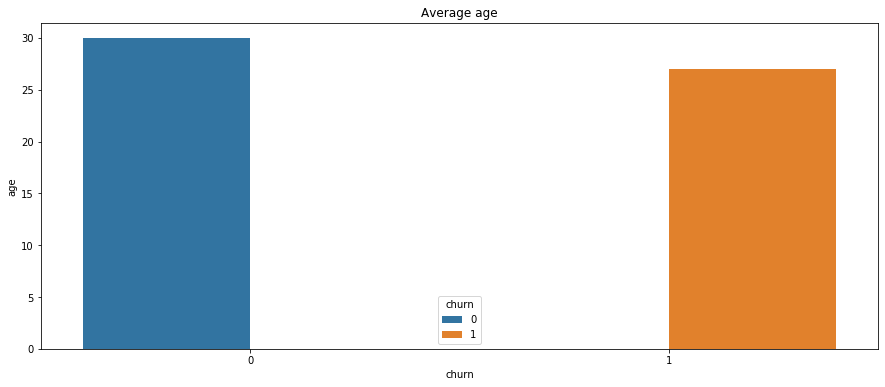

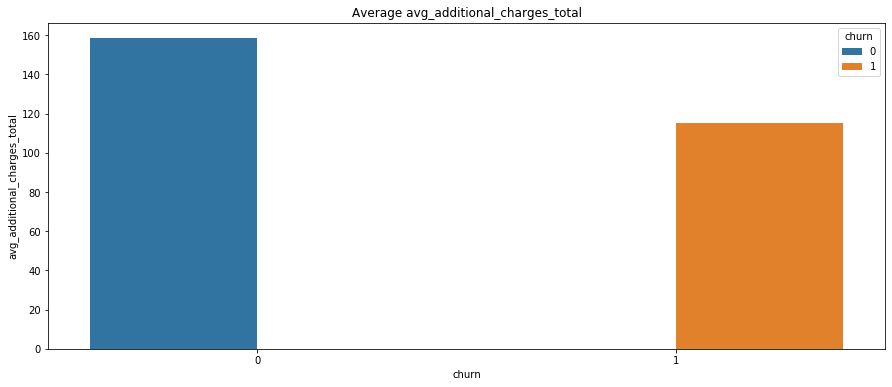

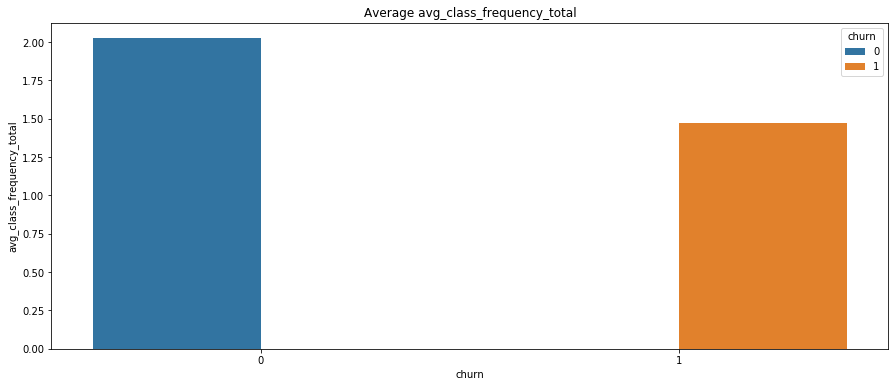

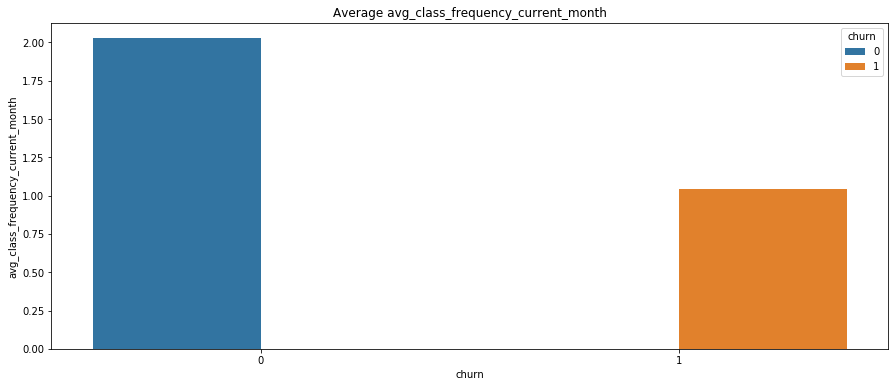

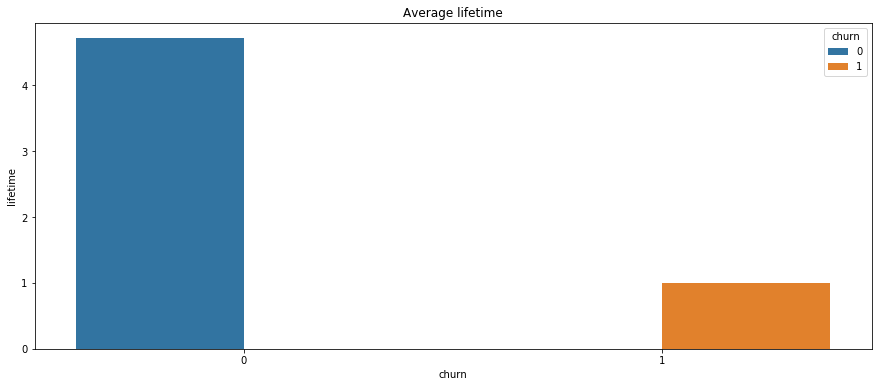

In [17]:
for column in aggr.columns:
    plt.figure(figsize=(15,6))
    sns.barplot(data=aggr, x='churn',y=column, hue='churn')
    plt.title('Average '+column)
    plt.show()

In [18]:
def pct_calc(df, column):
    plt.figure(figsize=(15,6))
    grouped = df.groupby(column).agg({column:'count'}).rename(columns={column:'count'}).reset_index()
    grouped['pct'] = (grouped['count'] / grouped['count'].sum())*100
    sns.barplot(data = grouped, x=column, y='pct', hue=column)
    plt.show()
#функция для построения барплотов процентного соотношения в разбике по признаку.   

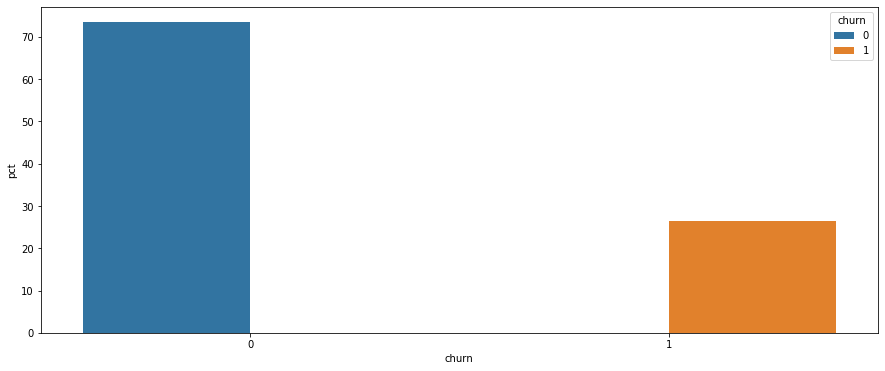

In [19]:
pct_calc(df, 'churn') #работает 

In [20]:
#for i in columns:
#    pct_calc(df,i)
    

In [21]:
def hist_calc(df, column):
    plt.figure(figsize=(15,6))
    sns.histplot(df, x=column)
    plt.show()
# функция для гистограмм    

In [22]:
#for i in columns2:
#    hist_calc(df,i)

In [23]:
churn = df.query('churn==1')
not_churn = df.query('churn==0')

In [24]:
churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


In [25]:
not_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


Описательные статистики, конечно, хорошо, но мне кажется куда удобнее демонстрировать их на графиках. 

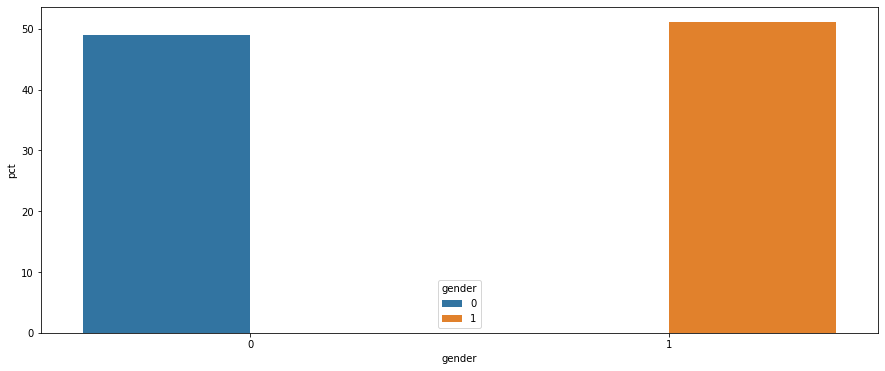

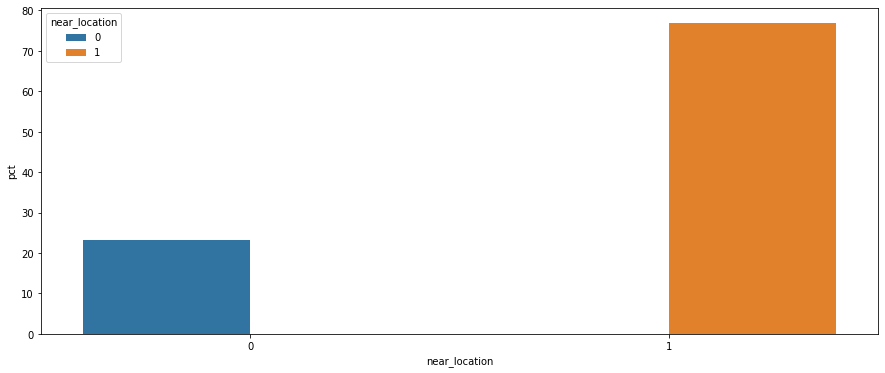

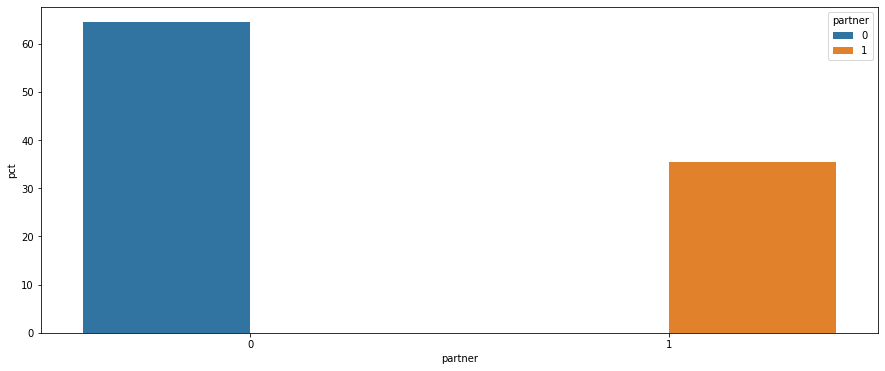

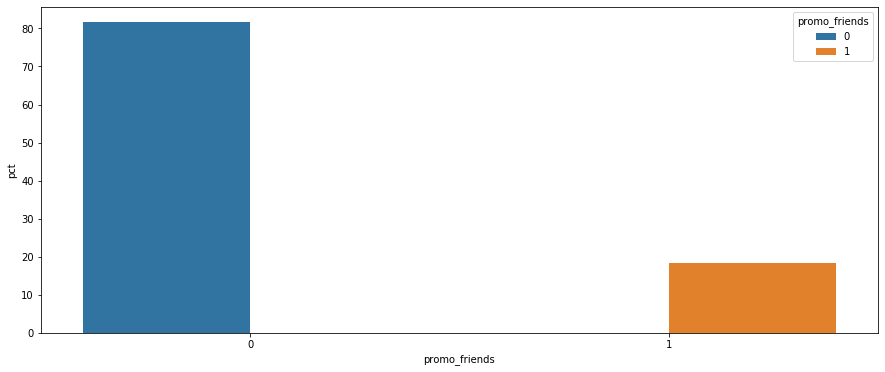

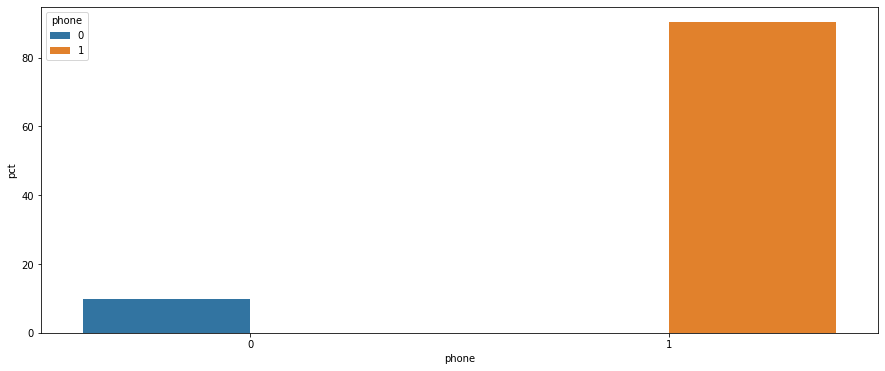

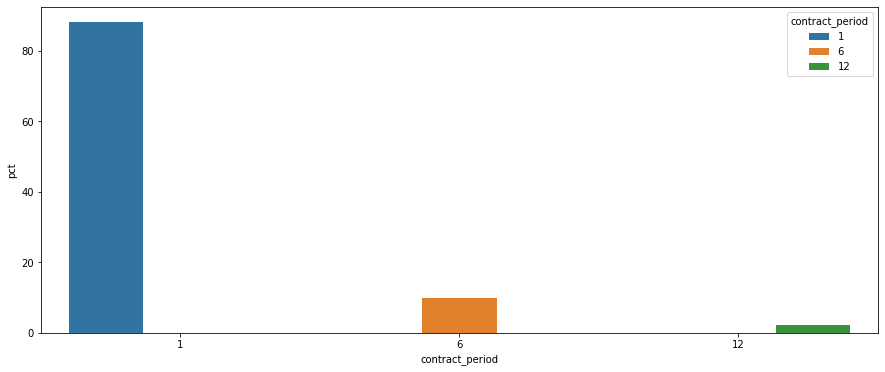

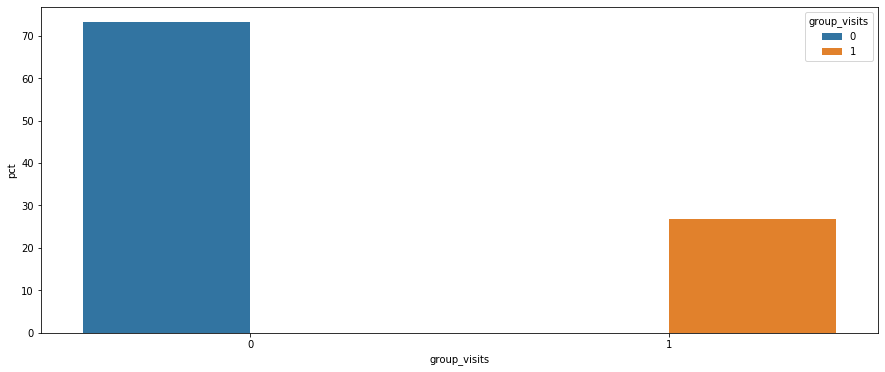

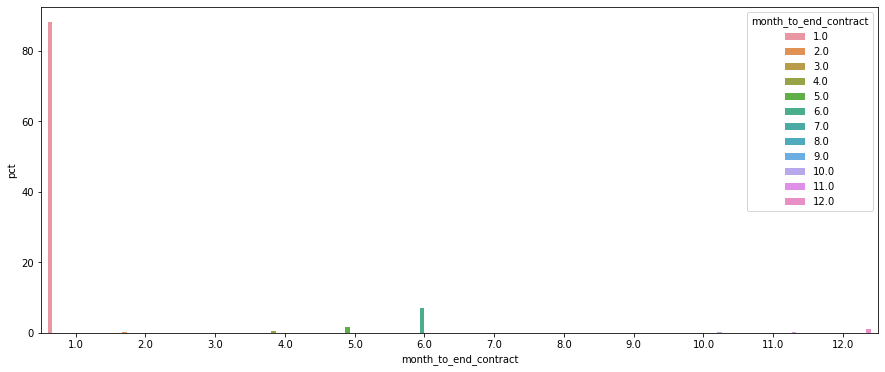

In [26]:
for i in columns:
    pct_calc(churn,i)

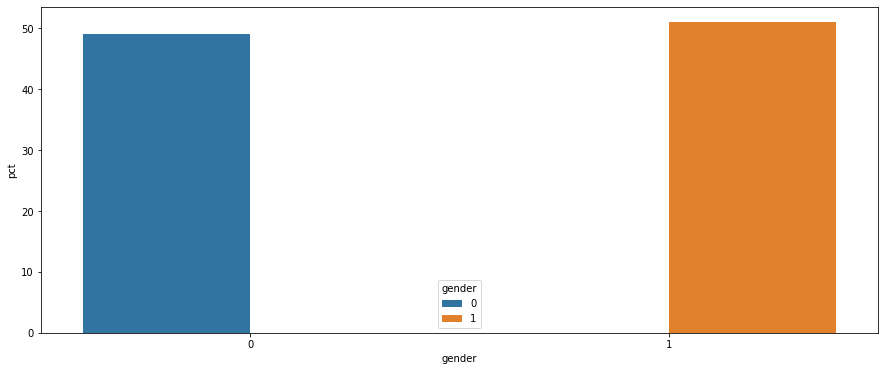

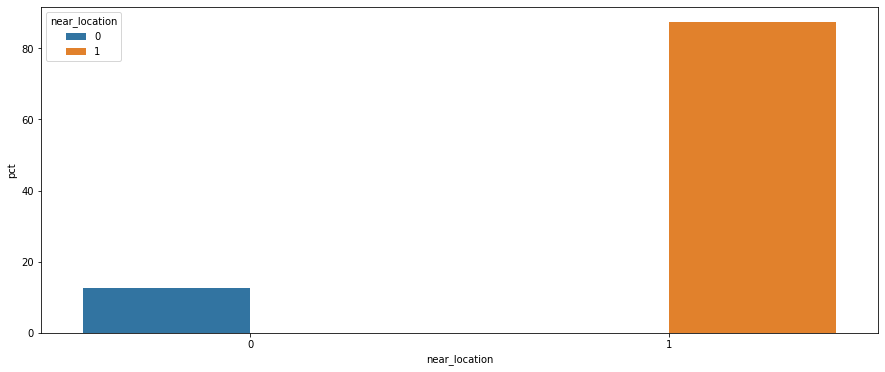

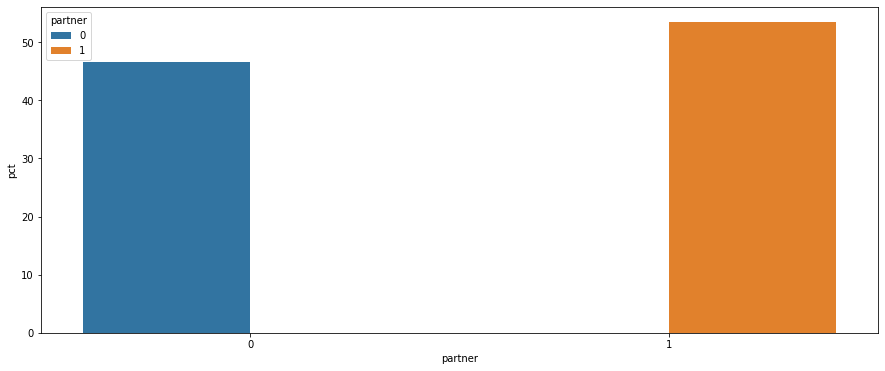

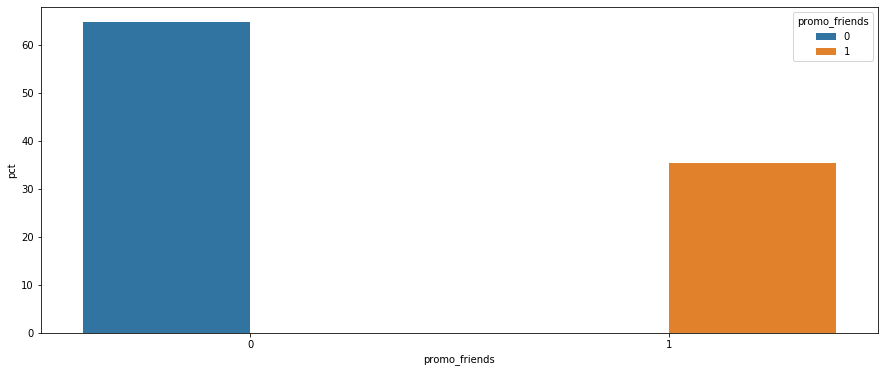

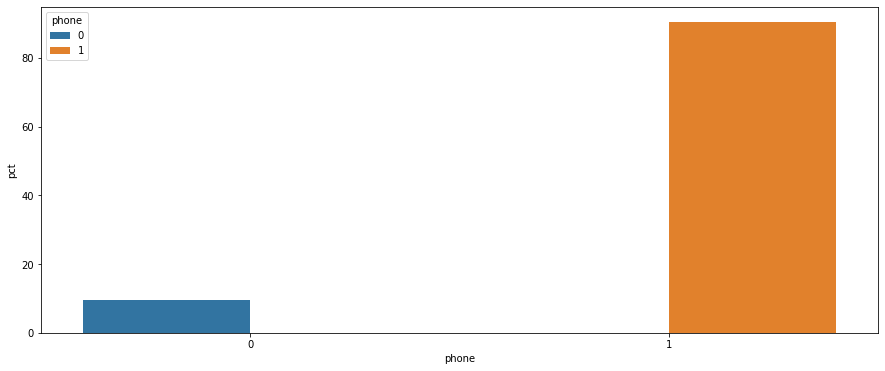

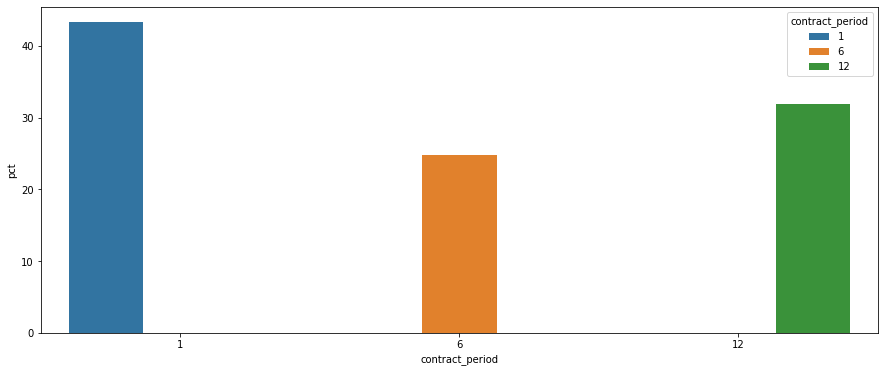

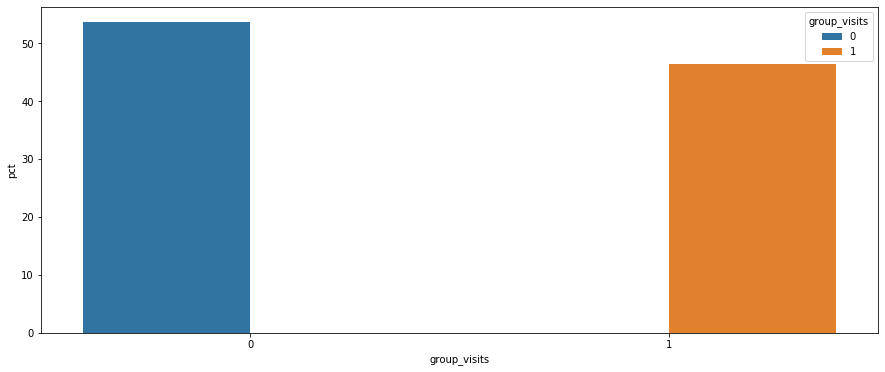

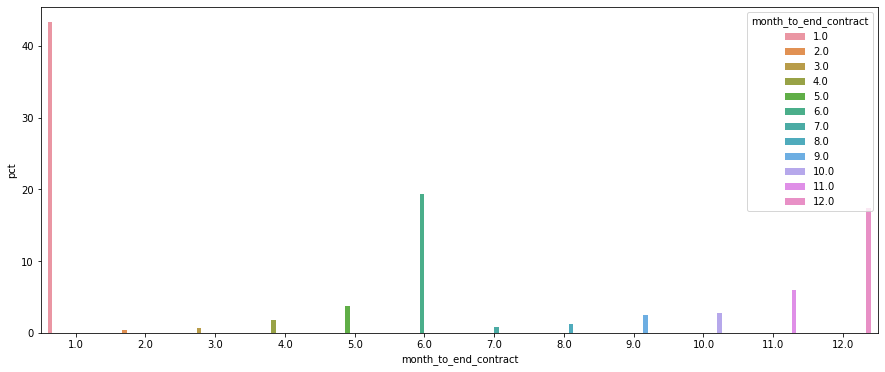

In [27]:
for i in columns:
    pct_calc(not_churn, i)

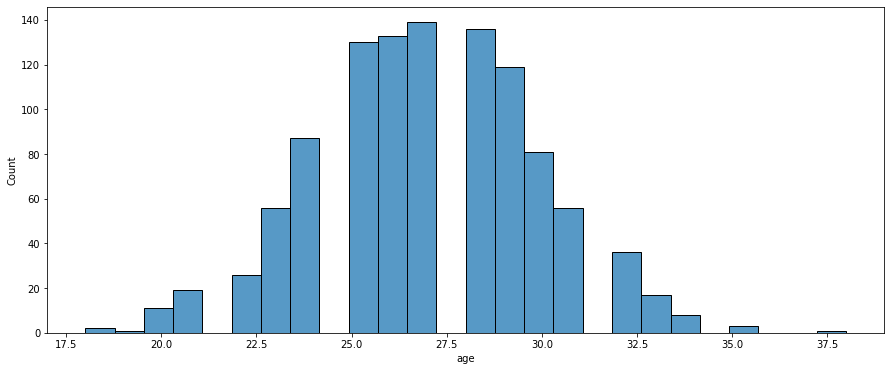

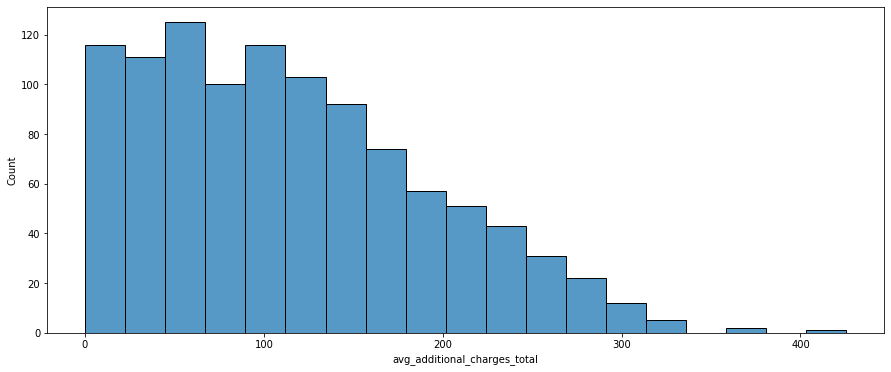

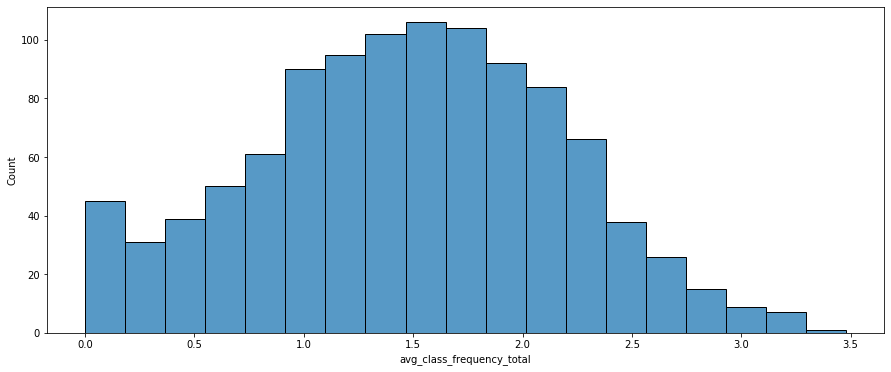

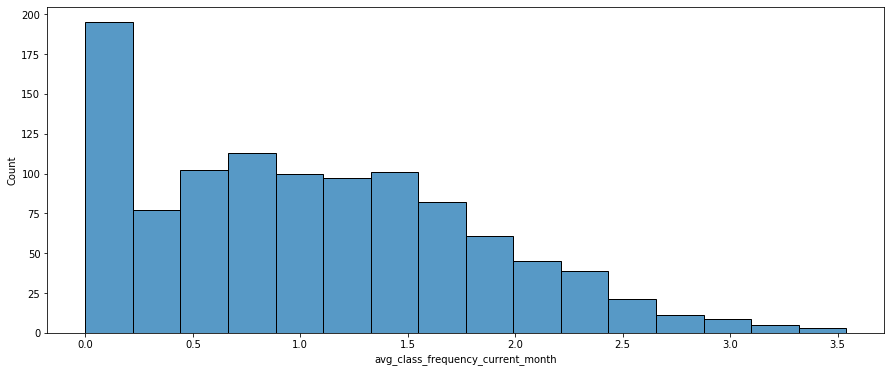

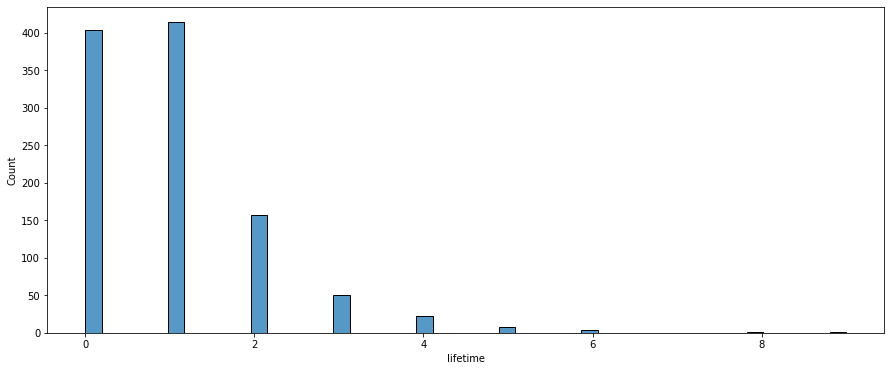

In [28]:
for i in columns2:
    hist_calc(churn, i)

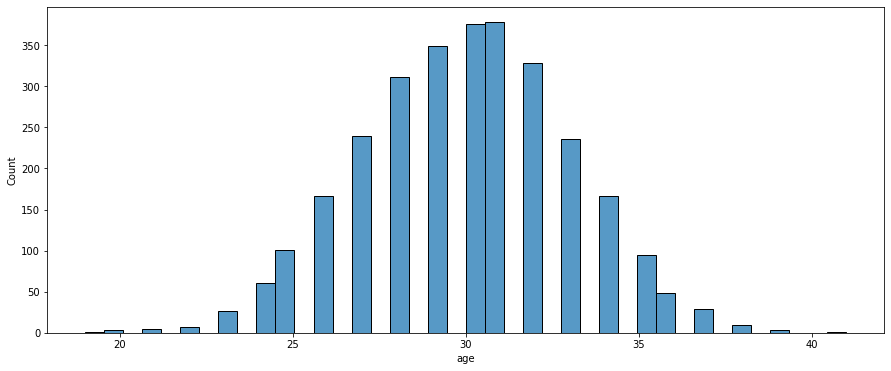

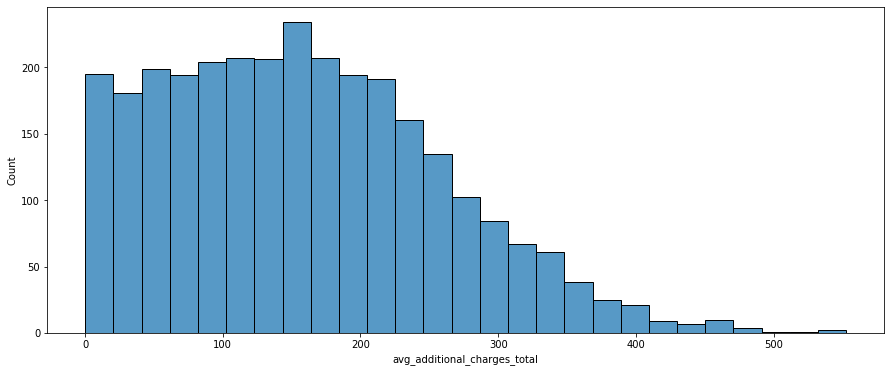

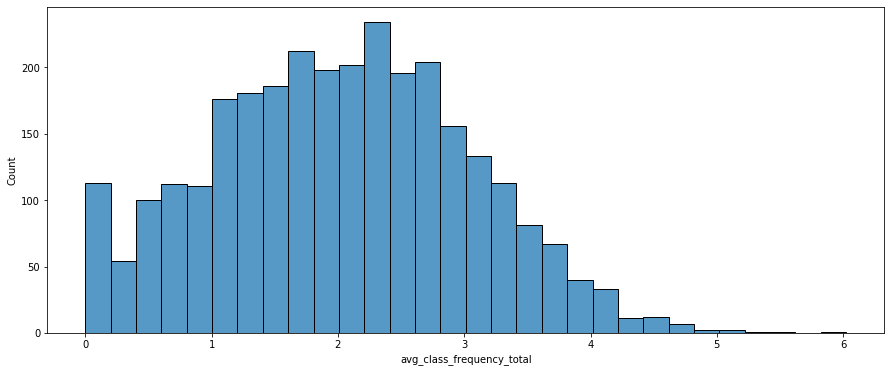

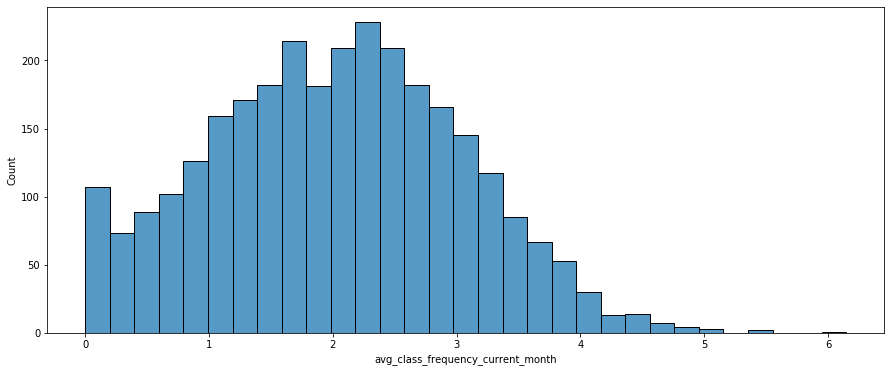

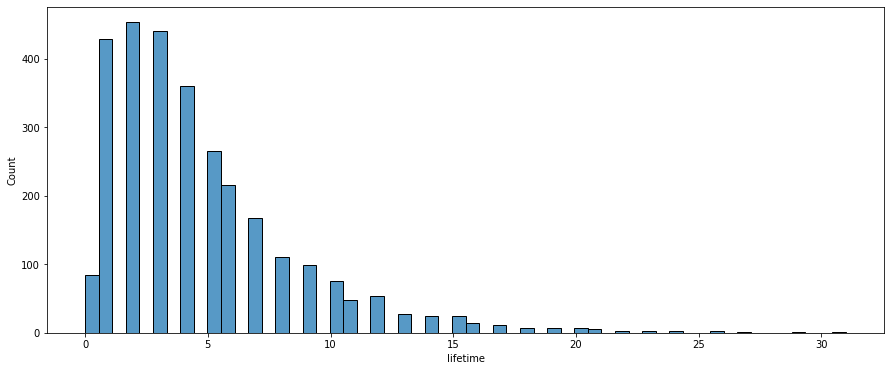

In [29]:
for i in columns2:
    hist_calc(not_churn, i)

Подводя итог, по первой функции мы видим, что люди, которые покинули нас - это люди, которые вероятно брали некоторый триал. т.е. они купили абонемент на 1 месяц, пришли они одни, т.е. скорее не использовали промо-друзей, их компания не партнер (в этом смысле наличие фитнес-бадди возможно уменьшает шанс покинуть фитнес центр, мои прошлые исследования говорят, что активная социальная вовлеченность увеличивает частоту занятий спортом). Они реже ходят на групповые. Если суммировать, то это люди не вовлеченные в продукт фитнес-центра. Вероятно, они пробуют, им не нравится и они уходят. Если нравится, то скорее всего покупают более длительный абонимент. 

По второй функции отличия следующие: мы видим, что в целом с людей, которые остались фитнес-центр зарабатывает больше по доп. услугам, но эта метрика может быть смещена, т.к. вероятно показатель за весь период, т.е. чем больше лайфтайм, тем выше вероятность, что в один месяц человек потратил так много, что это перекосило среднее. А те, кто ушли, как мы знаем, уходят в первый лайфтайм, следовательно у них такая вероятность ниже, либо же наоборот в первый лайфтайм люди стараются тратить меньше. 

Также, мы видим, что те, кто ушли, ходили в месяц реже. Однако в обоих случаях показатель довольно низкий,  т.к. от 2-3 раз в месяц для тех, кто не ушел это очень мало. 

Ну и по лайфтаймам мы видим, что отваливаются в основном те, кто пришел недавно. 

Суммируя все это, основная проблема вероятно с плохим удержанием клиентов. Жаль, что нет id, в таком случае можно было бы также рассчитать Retention rate.  

In [30]:
x = df.drop('churn', axis = 1)

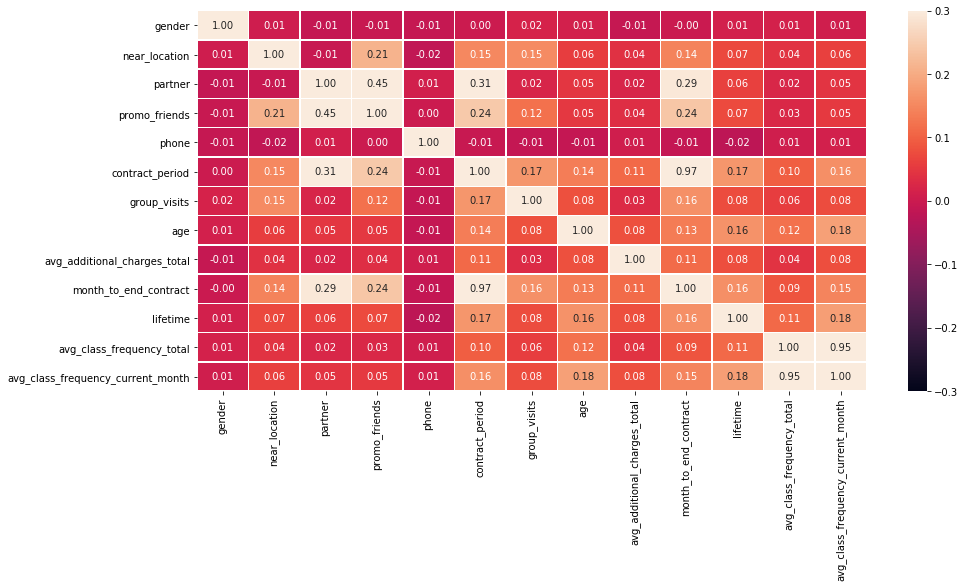

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(x.corr(),annot=True, linecolor = 'white', vmin = -0.3, vmax=0.3, fmt = '0.2f', linewidths=.5)
plt.show()
#корелляции выше 0.4 я буду считать достаточной для мультиколлениарности 

Как видим, сильно коррелируют промо-друзья и компания партнер, длительность контракта и месяцев до конца контракта(что логично), среднее посещения в месяц и в целом, можно еще сказать длительность контракта и компания партнер, но там относительно умеренная зависимость. Делать какие-то коррекции я не буду, т.к. мы используем логистическую регрессию, а она, судя по документации, автоматически применяет регулизацию. 

# 3.Постройте модель прогнозирования оттока клиентов

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

In [32]:
y = df['churn']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.

С учетом мультиколлениарности, я буду использовать регуляцию методом Лассо 

In [34]:
model_log = LogisticRegression(random_state = 0) 
model_for = RandomForestClassifier(random_state=0)

In [35]:
model_log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
model_for.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
log_prediction = model_log.predict(x_test)
for_prediction = model_for.predict(x_test)

Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [38]:
def metrics(y_test, y_pred):
    print('Accuracy score', accuracy_score(y_test, y_pred))
    print('Precision score',precision_score(y_test, y_pred))
    print('Recall score', recall_score(y_test, y_pred))
    print('F1 score', f1_score(y_test, y_pred))

In [39]:
metrics(y_test, log_prediction)

Accuracy score 0.925
Precision score 0.8631578947368421
Recall score 0.8282828282828283
F1 score 0.8453608247422681


In [40]:
metrics(y_test, for_prediction)

Accuracy score 0.9075
Precision score 0.8333333333333334
Recall score 0.7828282828282829
F1 score 0.8072916666666667


Логистическая регрессия показывает, что в целом она лучше справляется с предсказыванием исходов. Для Accuracy нужно также сделать поправку, что рапределение целевой метрики отличается от 50 на 50, что несколько искажает надежность метрики качества. 

In [41]:
coefs = pd.DataFrame(data = {'feature': x.columns,'coefficient':pd.Series(model_log.coef_.flatten())})
coefs.sort_values(by='coefficient', ascending = False)

,feature,coefficient
11,avg_class_frequency_total,3.470850
4,phone,0.611301
1,near_location,0.052976
0,gender,0.047777
8,avg_additional_charges_total,-0.004676
2,partner,-0.048439
9,month_to_end_contract,-0.066940
7,age,-0.181963
5,contract_period,-0.188969
3,promo_friends,-0.568434


Как я уже говорил, я хочу проверить две библиотеки. Теперь я попробую решить данную задачу логистической регрессией из statsmodels. Данная регрессия более привычная для меня, т.к. именно такого типа аутпут выдают Стата и СПСС.

In [42]:
reg = Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.213821
         Iterations 9


In [43]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3987
Method:                           MLE   Df Model:                           12
Date:                Fri, 07 May 2021   Pseudo R-squ.:                  0.6304
Time:                        18:46:43   Log-Likelihood:                -855.29
converged:                       True   LL-Null:                       -2313.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
gender                                0.2033      0.123      1.649      0.099      -0.038       0.445
near_location                         0.4690      0.163      2.881      0.004       0.150       0.788
partner                               0.0940      0.142      0.663      0.507      -0.184       0.372
promo_friends                        -0.5194      0.167     -3.118      0.002      -0.846      -0.193
phone                                 1.5802      0.225      7.008      0.000       1.138       2.022
contract_period                      -0.2427      0.104     -2.343      0.019      -0.446      -0.040
group_visits                         -0.7425      0.134     -5.559      0.000      -1.004      -0.481
age                                   0.0274      0.010      2.772      0.006       0.008       0.047
avg_additional_charges_total         -0.0035      0.001     -5.049      0.000      -0.005      -0.002
month_to_end_contract                -0.0100      0.112     -0.090      0.928      -0.229       0.209
lifetime                             -0.9456      0.053    -17.958      0.000      -1.049      -0.842
avg_class_frequency_total             4.4706      0.252     17.714      0.000       3.976       4.965
avg_class_frequency_current_month    -4.9744      0.249    -19.978      0.000      -5.462      -4.486
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Чем мне нравится этот подход, это сразу расчет p-value, так мы можем судить о значимости того или иного коэффициента, а таже посмотреть на дов. интервал. С другой стороны здесь, как я понял, мы не можем рассчитать метрики качества. 

В целом обе модели показывают схожие результаты.

Что для меня остается странным, это разное направление связи для среднего количества посещений в текущем месяце и в целом. Чем чаще человек ходит в текущем месяце, тем меньше шанс того, что он уйдет, в то же время чем чаще он ходит в целом, тем выше шанс того, что он уйдет.  

# 4.Сделайте кластеризацию клиентов

Стандартизируйте данные

In [44]:
scaler = StandardScaler()

In [45]:
x_st = scaler.fit_transform(x)

In [46]:
link = linkage(x_st, method = 'ward')

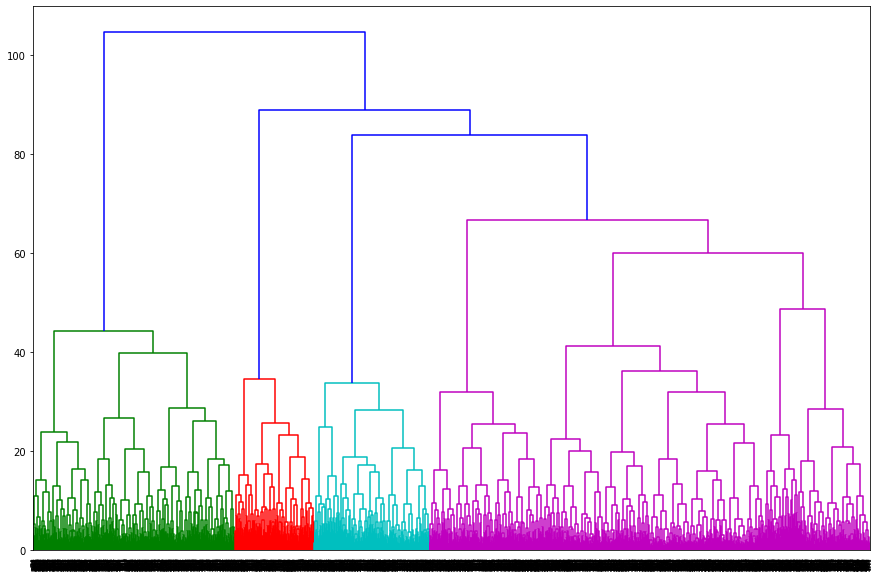

In [47]:
plt.figure(figsize=(15, 10))  
dendrogram(link, orientation='top')
plt.show() 

Вроде бы кластера 4, но вот крайний узел показывает, что там действительно могло уместиться 2 кластера, вероятно это не сильно отличающиеся друг от друга люди? 

Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [48]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_st)

In [49]:
x['cluster'] = labels

In [50]:
x.groupby('cluster').mean() 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473


In [51]:
#def show_clusters_on_plot(df, x_name, y_name, cluster_name):
#    plt.figure(figsize=(10, 10))
#    sns.scatterplot(
#        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
#    )
#    plt.title('{} vs {}'.format(x_name, y_name))
#    plt.show()
#функция для расчета 

In [52]:
#show_clusters_on_plot(x, 'lifetime','contract_period', 'cluster')

In [53]:
x.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,3


In [54]:
def countplot2(df, column):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column, hue='cluster')
    plt.title(column)
    plt.show()

In [55]:
#countplot2(x, 'gender')

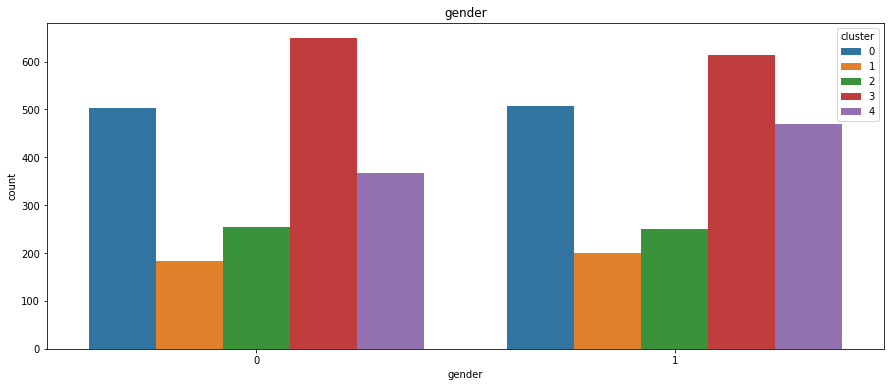

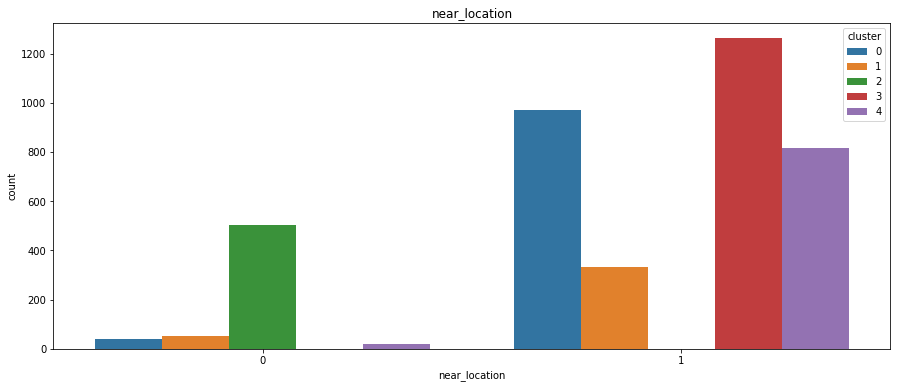

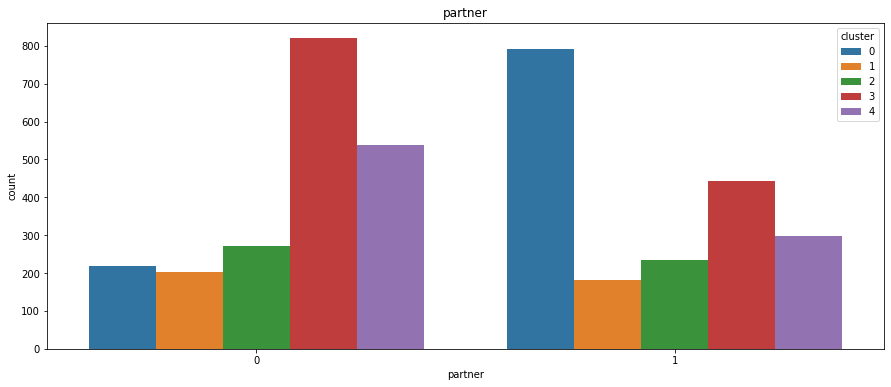

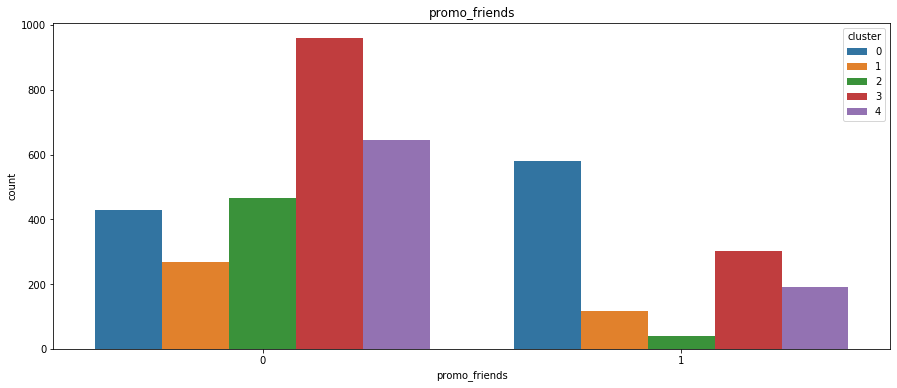

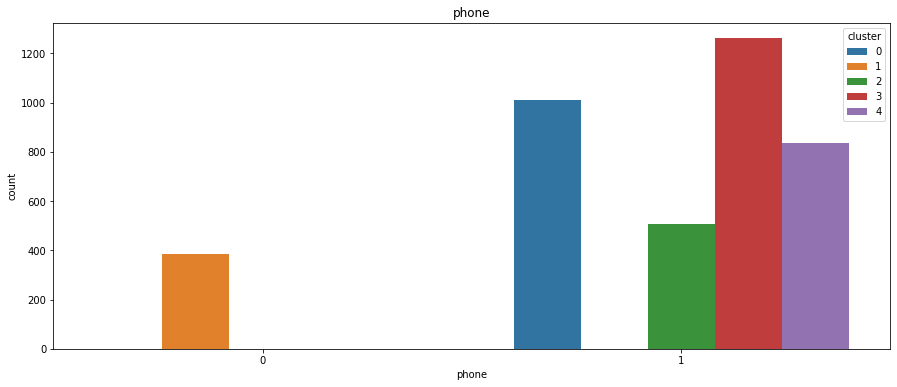

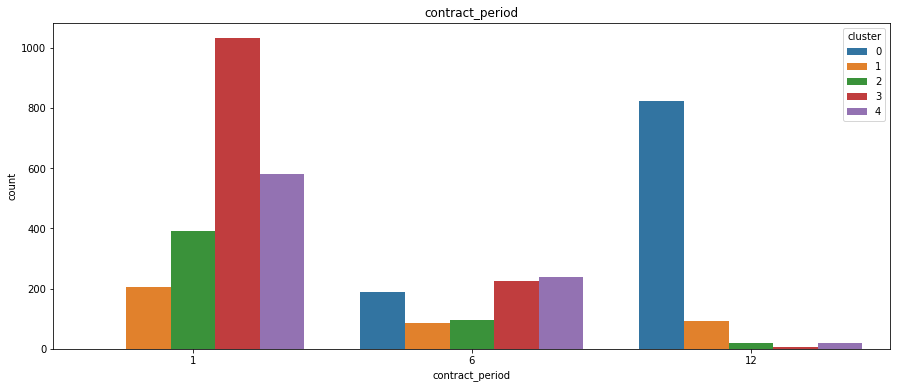

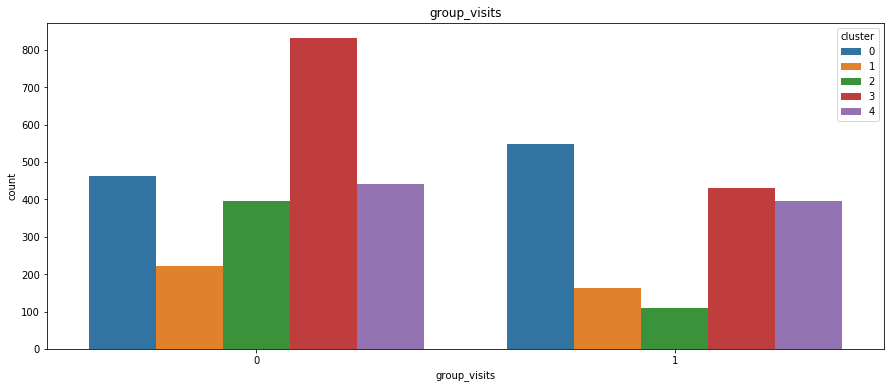

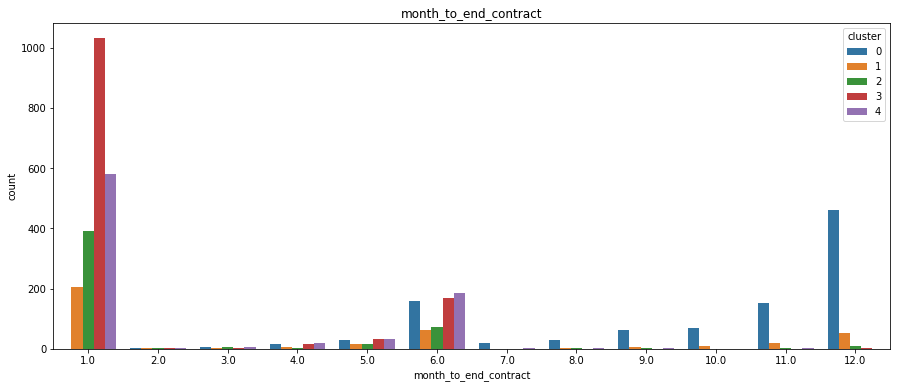

In [56]:
for i in columns:
    countplot2(x,i)

Похоже, что 1 кластер это как раз те, кто уходит,остальные кластеры более менее похожи, но вот 2 это наиболее вовлеченный кластер. 

In [57]:
df['cluster'] = labels

Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [58]:
df.groupby('cluster')['churn'].mean()

cluster
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

In [59]:
cluster_sizes = df.groupby('cluster').agg({'churn':'count'}).rename(columns={'churn':'size'}).reset_index()
cluster_sizes

,cluster,size
0,0,1011
1,1,385
2,2,505
3,3,1262
4,4,837


In [60]:
grouped = df.groupby(['cluster', 'churn']).agg({'churn':'count'}).rename(columns={'churn':'count'}).reset_index()
grouped = grouped.merge(cluster_sizes, on='cluster')

In [61]:
grouped['pct'] = (grouped['count'] / grouped['size'])*100
grouped

,cluster,churn,count,size,pct
0,0,0,983,1011,97.230465
1,0,1,28,1011,2.769535
2,1,0,282,385,73.246753
3,1,1,103,385,26.753247
4,2,0,281,505,55.643564
5,2,1,224,505,44.356436
6,3,0,613,1262,48.573693
7,3,1,649,1262,51.426307
8,4,0,780,837,93.189964
9,4,1,57,837,6.810036


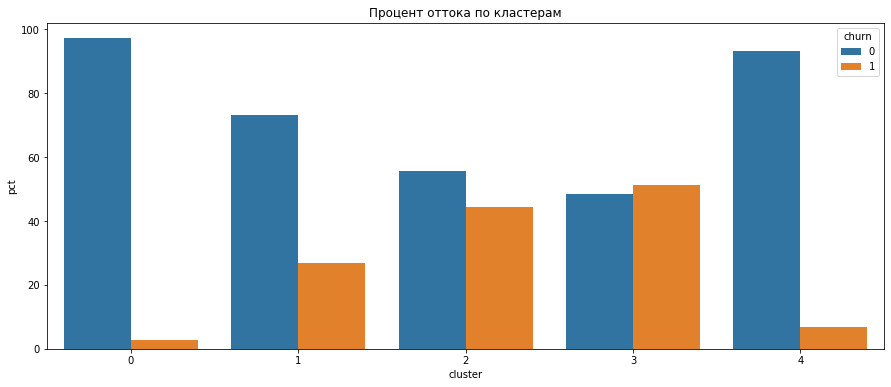

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(data=grouped, x='cluster', y ='pct', hue = 'churn')
plt.title('Процент оттока по кластерам')
plt.show()

Как мы видим, меньше всех значение у кластера 1 и 2, у 0 и 3 значение меньше 0.5, но довольно высокое, чтобы сказать, что они лояльные. А вот 4 кластер наиболее склонен к оттоку. 

# 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Как мы выяснили, основная особенность уходящих людей - это низкий уровень волвеченности или отсутствие некоторого якоря ( компания партнер, друг). Формально можно разделить отвалившихся на "роумеров" и "завтра начну". Первые это люди с коротким контрактом, которые вероятно пришли потестить фитнес-центр, вовлекаются во все услуги плохо, вторые это люди, купившие контракт на 6 и 12 месяцев, но толком не ходившие. У обеих групп проблемы с вовлечением. 
* Модель предсказания показала, что групповые занятия и промо-друзей довольно важные факторы, возможно стоит делать им некотоыре бонусы или агитировать приводить друзей, в таком случае шанс, что и они уйдут ниже. 
* Девать спецпредложения на групповые занятия
* Также, роумеры чаще пользуются 1 месячным тарифом, если их лайфтайм увеличится, то шанс уйти также снизится. Возможно им стоит делать бонусы на продление тарифа

Примерно так, советы подойдут для обеих групп. 